In [1]:
import torch 
import torch.nn as nn
import math
import matplotlib.pyplot as plt

In [2]:
class ActivationFunction(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {"name" : self.name}


In [3]:
# Sigmoid
class Sigmoid(ActivationFunction):
    def forward(self, z):
        return 1/(1+torch.exp(-z))

# Tanh
class Tanh(ActivationFunction):
    def forward(self, z):
        expz, exp_negz = torch.exp(z), torch.exp(-z)
        return (expz - exp_negz)/(expz + exp_negz)


# ReLU
class ReLU(ActivationFunction):
    def forward(self, z):
        return torch.where(z > 0, z, 0)

# LeakyReLU
class LeakyReLU(ActivationFunction):
    def __init__(self, alpha=0.1):
        super().__init__()
        self.config["alpha"] = alpha
        
    def forward(self, z):
         return torch.where(z > 0, z, self.config["alpha"]*z)


In [4]:
def get_gradient(fn, z):
    """compute the gradient of the activation function at given z
        Args:
            fn: Activation Function
            z: 1-D input tensor 
        Returns:
            A tensor of the gradient of fn having the same size as z
    """
    z = z.clone().requires_grad_()
    out = fn(z)
    out.sum().backward()
    return z.grad

In [5]:
def plot_activation_function(act_fn, ax, x):
    y = act_fn(x)
    y_grads = get_gradient(act_fn, x)
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    ax.plot(x, y, linewidth=2, label='Activation Function')
    ax.plot(x, y_grads, linewidth=2, label='Gradient')
    ax.set_title(act_fn.name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())
    ax.grid(1)

In [6]:
act_fn_by_name = {"sigmoid": Sigmoid, "tanh": Tanh, "relu": ReLU, "leakyrelu": LeakyReLU}
act_fns = [act_fn() for act_fn in act_fn_by_name.values()]

In [7]:
act_fns

[Sigmoid(), Tanh(), ReLU(), LeakyReLU()]

Let's Visualize the diffent activation functions and their gradients

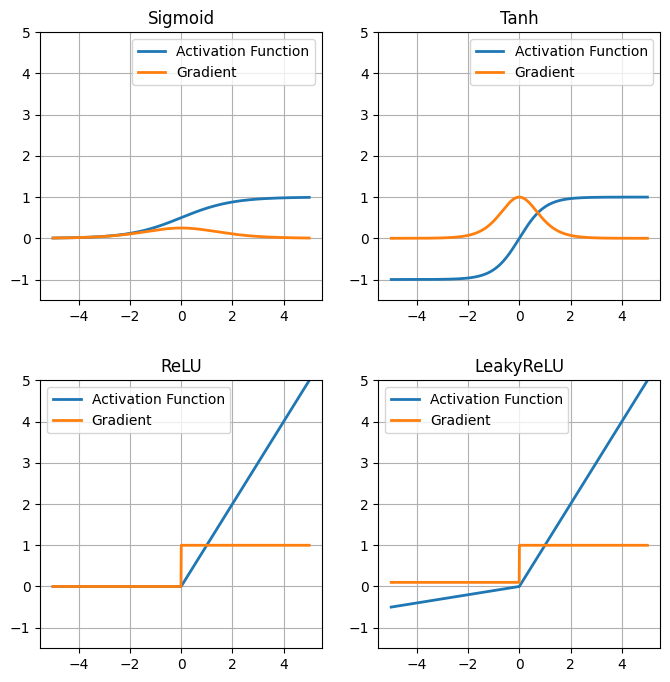

In [8]:
x = torch.linspace(-5, 5, 1000) 
cols = 2
rows = math.ceil(len(act_fns) / float(cols))
fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
for i, act_fn in enumerate(act_fns):
    plot_activation_function(act_fn, ax[divmod(i, cols)], x)

fig.subplots_adjust(hspace=0.3)
plt.show()